In [1]:
#Fatma Betul Seker
#Lab 6 - Data Exploration
#25 Feb 2022
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Comparing Carbon Footprints (per capita) of Countries Around the World


Data from: https://data.world/footprint/nfa-2018-edition/workspace/file?filename=NFA+2018+Edition.csv

*Data covers: years 1961 to 2014

further info: https://data.footprintnetwork.org/#/

In [2]:
data_eco = pd.read_csv("NFA 2018 Edition.csv")
data_eco.head(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140020,0.199159,0.097000,0.036817,0.029258,0.000000,5.022540e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100925.003100,0.000000,1.732525e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.000000,4.273741e-01,3A
3,Armenia,1992,1,BiocapTotGHA,555812.972600,465763.337400,289190.662300,47320.224590,116139.598200,0.000000,1.474227e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,1.730092e+00,3A


In [3]:
data_eco = data_eco[data_eco['record'] == 'EFConsPerCap']
data_eco.head(5)
#Choosing only one reporter: EFConsPerCap (Ecological Footprint of consumption per capita)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
4,Armenia,1992,1,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,1.730092,3A
12,Armenia,1993,1,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,1.158431,3A
20,Armenia,1994,1,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,1.115877,3A
28,Armenia,1995,1,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1.028198,3A
36,Armenia,1996,1,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1.038000,3A


In [4]:
#Total carbon footprints per capita by countries 1992-2018
totalcarb = data_eco.groupby("country")["carbon"].sum()

In [5]:
totalcarb = totalcarb.sort_values().to_frame(name = "carbon")
totalcarb = totalcarb[totalcarb.carbon != 0]
totalcarb = totalcarb.reset_index().rename(columns = {"index": "country"})
#Bad data points are removed 
print(totalcarb.head(5))
print(totalcarb.tail(5))

            country    carbon
0       Timor-Leste  0.139446
1       South Sudan  0.179004
2        Tajikistan  0.198684
3  Papua New Guinea  0.258613
4           Senegal  0.268507
                      country      carbon
164                   Bahrain  298.353829
165                     Qatar  338.896610
166      United Arab Emirates  339.254308
167  United States of America  379.111802
168                Luxembourg  578.360999


In [17]:
#Choosing random points to visualize
row = np.random.randint(0,168, 5)
rand_countries = totalcarb.loc[row]
rand_countries

,country,carbon
163,Canada,272.223953
69,Gambia,9.057443
139,New Zealand,118.358415
132,Kazakhstan,92.225791
86,Montenegro,20.150428


Text(0.5, 1.0, "Comparison of Random Countries' Total Carbon Footprints Between 1961-2014")

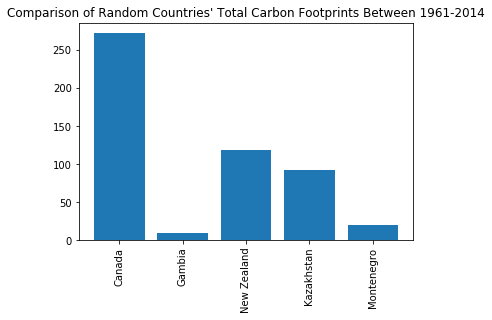

In [18]:
plt.bar(rand_countries.country,rand_countries.carbon)
plt.xticks(rotation = "vertical") #to prevent overlapping in x-axis
plt.title("Comparison of Random Countries' Total Carbon Footprints Between 1961-2014")

Text(0.5, 1.0, "Countries' Total Carbon Footprints per capita between 1961-2014")

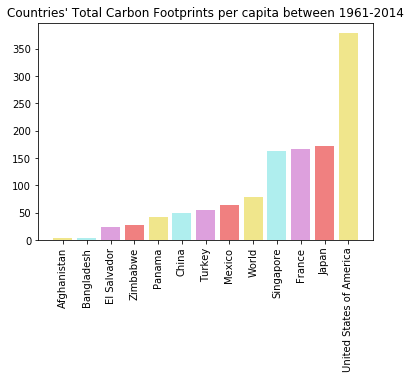

In [8]:
#Choosing countries that I found interesting so I can comment on graphs (somewhat biased)
my_countries = ["Turkey", "United States of America", "Singapore", "El Salvador",
                "Mexico", "China", "France", "Panama", "Bangladesh","Zimbabwe", "Afghanistan",
                "Japan", "World"]
mtotalcarbs = totalcarb[totalcarb.country.isin(my_countries)]
clr = ["khaki", "paleturquoise", "plum", "lightcoral"]
plt.bar(mtotalcarbs.country, mtotalcarbs.carbon, color = clr)
plt.xticks(rotation = 'vertical')
plt.title ("Countries' Total Carbon Footprints per capita between 1961-2014")

We can see that there is great variation in total carbon footprints among countries and we can see some distinct groups which have similar total CFs. 

According to UN's WESP 2021 Classification: we can classify U.S.A, Japan, France, Singapore, China as high-income countries; Mexico, Turkey, China, Panama, as upper-middle income countries and; Zimbabwe, Afghanistan, El Salvador, Bangladesh as low-income countries. (attached as file)

With reference to this, We can clearly see that there is strong correlation between countries' income rate and carbon footprints.

We see that world's average (per capita) is similar to upper-middle income countries.


Text(0.5, 1.0, 'Countries Carbon Footprints Change Over Time')

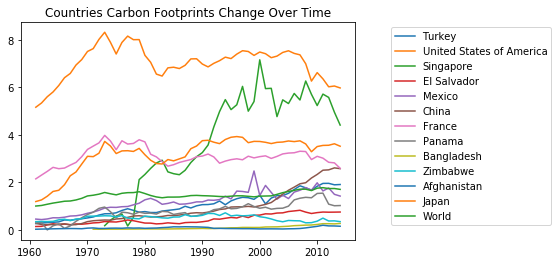

In [9]:
#The countries' carbon footprint change over time
for country in my_countries:
    dfplot = data_eco[data_eco.country == country]
    plt.plot(dfplot.year, dfplot.carbon)

plt.legend(my_countries, loc="upper right",bbox_to_anchor=(1.6, 1))
plt.title("Countries Carbon Footprints Change Over Time")

We can see that developed countries has increased their carbon footprints between 60s and 70s dramatically. United States as a distinctly high start in 1960. After 70s, we can see a trend of stabilization or decline in CFs of developed countries.

Singapore has a prominent change in CF's over time. Its dramatic rise of filling the atmosphere with green-house gasses begins relatively late and reaches a point that's almost as high as the U.S. Singapore is a developing country within high-income range
according to UN. 

Other developing countries and low income countries seem remained relative stable at this scale but we might need to zoom in to get a more clear vision.



Text(0.5, 1.0, 'Change in Carbon Footprints of Countries with Relatively Low Total CF')

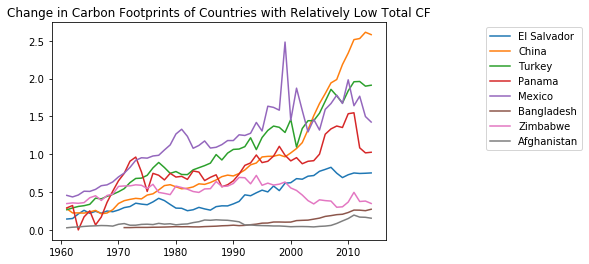

In [10]:
lowerpart = ["El Salvador", "China", "Turkey", "Panama", "Mexico", "Bangladesh", "Zimbabwe", "Afghanistan"]
for country in lowerpart:
    dfplot = data_eco[data_eco.country == country]
    plt.plot(dfplot.year, dfplot.carbon)

plt.legend(lowerpart, loc="upper right",bbox_to_anchor=(1.6, 1))
plt.title("Change in Carbon Footprints of Countries with Relatively Low Total CF")

When we plot carbon footprint only for countries lower level of carbon footprint, we can see an increasing trend among most of them clearly. Zimbabwe looks like the only counter-example in our sample of countries. 

Per capita CF of China has increased almost 5 times between 1961 and 2014. Turkey's and Mexico's has increased more than 3 times and we can say it's doubled for the others overall. 

Text(0.5, 1.0, 'Change in Carbon Footprints of Countries with Relatively High Total CF')

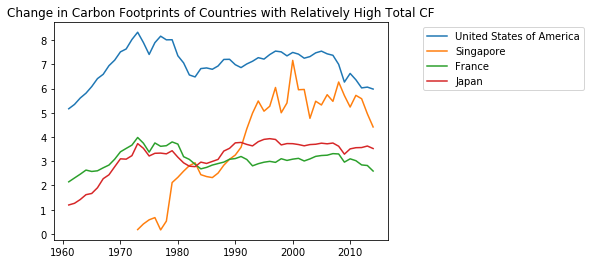

In [11]:
upperpart = ["United States of America", "Singapore", "France", "Japan"]
for country in upperpart:
    dfplot = data_eco[data_eco.country == country]
    plt.plot(dfplot.year, dfplot.carbon)

plt.legend(upperpart, loc="upper right",bbox_to_anchor=(1.6, 1))
plt.title("Change in Carbon Footprints of Countries with Relatively High Total CF")

In this graph, we can see only the countries with higher level of carbon footprint. Except Singapore, their carbon footprint level remains pretty stable after they reach their maximum peak. It looks like there is an increasing trend between 1960-1975 and then it stabilizes. Moreover, we could argue that there is a decreasing trend in the last years of the data. To defend this claim, we could check if this is related to an international agreement about climate change and carbon emissions. 

One of the first important steps to reduce carbon emission was the Kyoto Protocol at 1997. 

Text(0.5, 1.0, 'The Effect of Kyoto Protocol (1997) on Countries wih High CF')

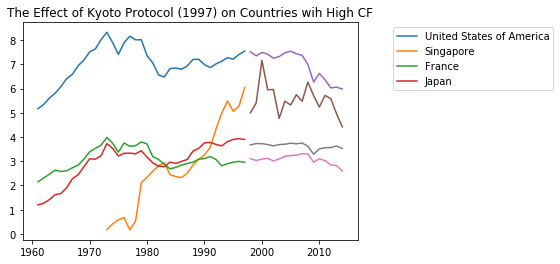

In [12]:
#After Kyoto Agreement (signed 1997)
for country in upperpart:
    dfplot = data_eco[data_eco.country == country]
    dfplot = dfplot[dfplot.year < 1998]
    plt.plot(dfplot.year, dfplot.carbon)

plt.legend(upperpart, loc="upper right",bbox_to_anchor=(1.6, 1))

for country in upperpart:
    dfplot = data_eco[data_eco.country == country]
    dfplot = dfplot[dfplot.year > 1997]
    plt.plot(dfplot.year, dfplot.carbon)

plt.legend(upperpart, loc="upper right",bbox_to_anchor=(1.6, 1))

plt.title("The Effect of Kyoto Protocol (1997) on Countries wih High CF")

The Kyoto Protocol was signed by 37 industrialized countries and European Union at 1997. It was a commitment to individual countries to reduce their carbon dioxide and other greengas emissions relative to their historical level by 2012. (Source: https://unfccc.int/process-and-meetings/the-kyoto-protocol/what-is-the-kyoto-protocol/kyoto-protocol-targets-for-the-first-commitment-period)

35 countries, mostly advanced economies, managed to achieve their targets. 

With this graph, we could argue that a decreasing trend in the carbon footprint in advanced economies has started after Kyoto Protocol which can be more clearly seen in th U.S's line.
